<a href="https://colab.research.google.com/github/435wldms/essa/blob/main/20230519_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀

* 독립변수의 개수에 따라 단일, 다중 회귀
* 회귀 계수의 결합에 따라 선형, 비선형 회귀

**단순 선형 회귀를 통한 회귀 이해**

* 독립변수와 종속변수가 하나인 선형 회귀 
* Y^ = w0 + w1*X / Y = w0 + w1*X + e
* 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값-> 잔차의 제곱 합(RSS-비용함수)이 최소가 되는 모델이 최적의 회귀 모델

**비용 최소화하기 - 경사하강법(Gradient Descent) 소개**

* 점진적으로 반복적인 계산을 통해 w 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 w 파라미터를 구하는 방식
* 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w 값을 최적 파라미터로 반환
* 비용 함수가 포물선 형태의 2차 함수라 가정, 최초 w에서부터 미분을 적용한 뒤 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함, 더 이상 기울기가 감소하지 않는 지점이 비용 함수가 최소인 지점

* 경사 하강법 파이썬 코드로 구현
* y=4X+6을 근사하기 위한 100개의 데이터 세트 생성, 경사하강법을 통해 w1,w0 도출

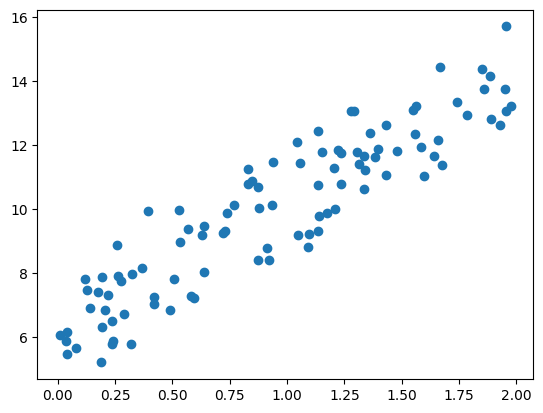

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4X+6을 근사(w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2* np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

* 비용 함수 정의

In [2]:
def get_cost(y,y_pred):
  N = len(y)
  cost= np.sum(np.square(y-y_pred))/N
  return cost

* 경사하강법 정의

In [3]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X,w1.T) + w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X + w0

print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


-> 결과 : 실제 선형식인 y = 4X +6과 유사하게 결과 도출, 예측 오류 비용 - 0.9935

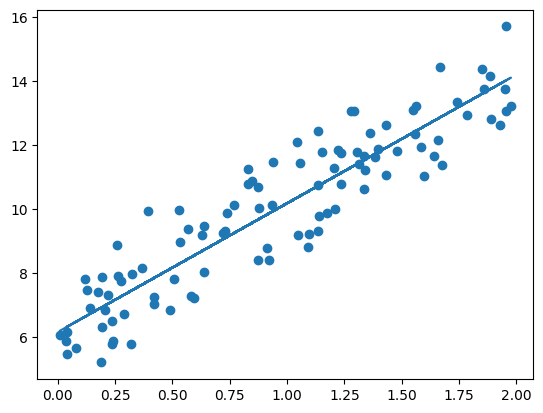

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

* 위의 경사하강법은 좋은 방법이지만 수행 시간이 매우 오래 걸린다는 단점이 있어 대부분 확률적 경사 하강법 이용
* 일부 데이터만 이용해 w가 업데이트되는 값을 계산 -> 속도가 빠름.
* 확률적 경사 하강법은 경사하강법과 유사하지만 X,y 데이터에서 랜덤하게 batch_size만큼 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이

In [7]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0
  
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
  
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1,w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X + w0

print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.028 w0:6.156
Stochastic Gradient Descent Total Cost:0.9937


-> 결과: 경사하강법이나 확률적 경사하강법이나 w1, w0 값에 큰 차이가 없고 예측 오류 비용도 확률적 경사하강법이 아주 조금 높을 뿐이므로 큰 예측 성능상의 차이가 없음 -> 큰 데이터 처리 시 확률적 경사하강법 주로 사용함.

**다항 회귀와 과(대)적합/과소적합 이해**

* 회귀가 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현되는 것
* 다항회귀는 선형 회귀!
* PolynomialFeatures 클래스를 통해 피처 변환한 후 fit, transform() 메서드 수행

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 \n',X)

# degree =2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


-> 결과 해석: [x1, x2] => [1,x1,x2,x1^2,x1*x2,x2^2]

* 3차 다항 회귀 함수를 임의로 설정해 이의 회귀 계수를 예측

In [10]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


* 일차 단항식 계수를 삼차 다항식 계수로 변환, 선형 회귀에 적용하면 다항 회귀 구현

In [11]:
from sklearn.linear_model import LinearRegression

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인 
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


-> 결과: 회귀 계수가 10개로 늘어나면서, LinearRegression을 적용했을때 원래 회귀 계수 값이랑 약간은 차이가 있으나 다항 회귀로 근사하고 있음.
>
-> PolynomialFeatures로 피처 변환 후 LinearRegression 클래스로 다항 회귀 구현

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Steamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수 \n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**

* 다항식의 차수가 높아지면 복잡한 피처 간의 관계까지 모델링이 가능하지만, 너무 학습 데이터에만 맞춘 학습이 이루어져서 과적합 문제 발생 가능

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1


 Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

 Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

 Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


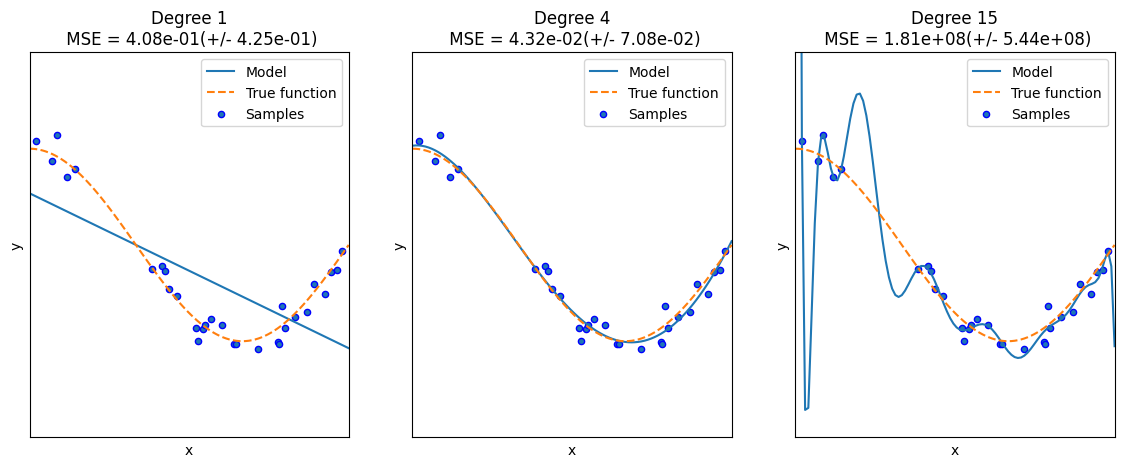

In [14]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가합니다. 
  scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\n Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test),'--',label='True function')
  plt.scatter(X,y, edgecolor='b',s=20, label ='Samples')

  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
  plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i],-scores.mean(),scores.std()))

plt.show()

-> 결과 : degree1 예측 곡선은 너무 단순, degree4 예측 곡선은 실제 데이터 세트와 유사, degree15 예측 곡선은 train 데이터 과적합으로 MSE 값이 과하게 큼.

**편형-분산 트레이드오프**

* degree1 모델 : 지나치게 한 방향성으로 치우친 고편향성 모델
* degree15 모델 : 학습 데이터 하나 하나의 특성을 반영해 매우 복잡한 고분산성 모델
* 저편향, 저분산 모델은 드물지만 좋은 모델
* 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향을 보임
* 편향 h, 분산 l : 과소 적합, 편향 l, 분산 h : 과적합